# Swing states

V případě amerických prezidentských voleb obecně platí, že ve většině států dlouhodobě vyhrávají kandidáti jedné strany. Například v Kalifornii vyhrává kandidát Demokratické strany or roku 1992, v Texasu kandidát Republikánské strany od roku 1980, v Kansasu do konce od roku 1968 atd. Státy, kde se vítězné strany střídají, jsou označovány jako "swing states" ("kolísavé státy"). Tvým úkolem je vybrat státy, které lze označit jako swing states.

V souboru [1976-2020-president.csv](1976-2020-president.csv) najdeš historické výsledky amerických prezidentských voleb. Každý řádek souboru obsahuje počet hlasů pro kandidáta dané strany v daném roce.

V souboru jsou důležité následující sloupce:

- `Year` - rok voleb,
- `State` - stát,
- `party_simplified` - zjednodušené označení politické strany,
- `candidatevotes` - počet hlasů pro vybraného kandidáta,
- `totalvotes` - celkový počet odevzdaných hlasů.

Proveď níže uvedené úkoly.

1. Urči pořadí jednotlivých kandidátů v jednotlivých státech a v jednotlivých letech (pomocí metody `rank()`). Nezapomeň, že data je před použitím metody nutné seřadit a spolu s metodou `rank()` je nutné použít metodu `groupby()`.
1. Pro další analýzu jsou důležití pouze vítězové. Vytvoř novou tabulku, která bude obsahovat pouze vítěze voleb.
1. Pomocí metody `shift()` přidej nový sloupec, abys v jednotlivých řádcích měl(a) po sobě vítězné strany ve dvou po sobě jdoucích letech.
1. Porovnej, jestli se ve dvou po sobě jdoucích letech změnila vítězná strana. Můžeš k tomu použít např. funkci `numpy.where()` nebo metodu `apply()`.
1. Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran.
1. Vytvoř sloupcový graf s 10 státy, kde došlo k nejčastější změně vítězné strany. Jako výšku sloupce nastav počet změn.

Pro další část pracuj s tabulkou se dvěma nejúspěšnějšími kandidáty pro každý rok a stát (tj. s tabulkou, která oproti té minulé neobsahuje jen vítěze, ale i druhého v pořadí).

1. Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.
1. Přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.
1. Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.
1. Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.

In [103]:
import pandas

data = pandas.read_csv("1976-2020-president.csv")
data = data.sort_values(["year", "state", "candidatevotes"], ascending=[True, True, False])
data["rank"] = data.groupby(["year", "state"])["candidatevotes"].rank(ascending=False)
data.to_csv("ukol_01_napoveda_01.csv", index=False)
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,2.0
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER,3.0
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER,4.0
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER,5.0


In [104]:
data = data[data["rank"] == 1]
data.to_csv("ukol_01_napoveda_02.csv", index=False)
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0
19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0
23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0


In [105]:
data = data.sort_values(["state", "year"])
data["previous_winner_party"] = data["party_simplified"].shift(1)
data.to_csv("ukol_01_napoveda_03.csv", index=False)
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_winner_party
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,None
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN


In [106]:
def zmena(row):
    if not pandas.isnull(row["previous_winner_party"]) and row["previous_winner_party"] != row["party_simplified"]:
        return 1
    return 0

data["change"] = data.apply(zmena, axis=1)
data.to_csv("ukol_01_napoveda_04.csv", index=False)
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_winner_party,change
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,None,0
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0


In [107]:
data_pivot = data.groupby(["state"])["change"].sum()
data_pivot = pandas.DataFrame(data_pivot)
data_pivot = data_pivot.sort_values("change", ascending=False)
data.to_csv("ukol_01_napoveda_05.csv", index=False)
data_pivot

,change
state,
OHIO,6
WISCONSIN,5
FLORIDA,5
GEORGIA,5
MISSOURI,4
IOWA,4
NEW MEXICO,4
NEW HAMPSHIRE,4
PENNSYLVANIA,4


<Axes: xlabel='state'>

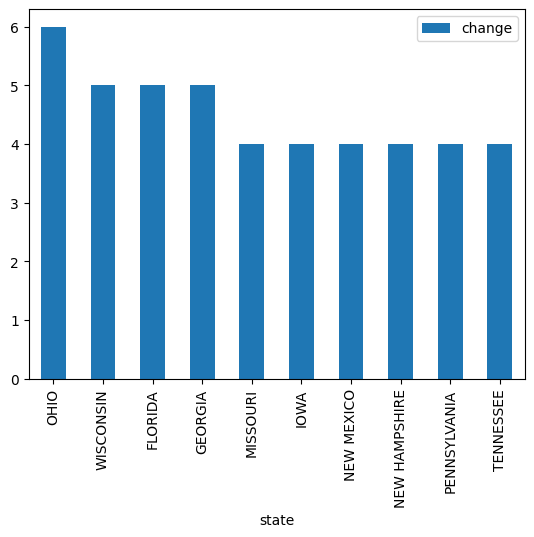

In [108]:
import matplotlib.pyplot as plt

data_pivot = data_pivot.iloc[:10]
data_pivot.plot(kind="bar")

In [109]:
data = pandas.read_csv("1976-2020-president.csv")
data = data.sort_values(["year", "state", "candidatevotes"], ascending=[True, True, False])
data["rank"] = data.groupby(["year", "state"])["candidatevotes"].rank(ascending=False)
data = data[data["rank"] <= 2]
data = data.reset_index()
data["second_candidate_votes"] = data.groupby(["year", "state"])["candidatevotes"].shift(-1)
data_winners = data[data["rank"] == 1]
data_winners = data_winners.reset_index()
data_winners["margin"] = data_winners["candidatevotes"] - data_winners["second_candidate_votes"]
data_winners.to_csv("ukol_01_napoveda_06.csv", index=False)
data_winners.head()

,level_0,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate_votes,margin
0,0,0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0
1,2,7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0,44058.0,27497.0
2,4,11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0,295602.0,123040.0
3,6,19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0,267903.0,230701.0
4,8,23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0,3742284.0,139960.0


In [110]:
data_winners["relative_margin"] = (data_winners["candidatevotes"] - data_winners["second_candidate_votes"])/data_winners["totalvotes"]
data_winners.to_csv("ukol_01_napoveda_07.csv", index=False)
data_winners.head()

,level_0,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,...,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate_votes,margin,relative_margin
0,0,0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",...,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0,0.131124
1,2,7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",...,False,71555,123574,20210113,NaN,REPUBLICAN,1.0,44058.0,27497.0,0.222514
2,4,11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",...,False,418642,742719,20210113,NaN,REPUBLICAN,1.0,295602.0,123040.0,0.165662
3,6,19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",...,False,498604,767535,20210113,NaN,DEMOCRAT,1.0,267903.0,230701.0,0.300574
4,8,23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",...,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0,3742284.0,139960.0,0.017935


In [111]:
data_winners = data_winners.sort_values("relative_margin")
data_winners.to_csv("ukol_01_napoveda_08.csv", index=False)
data_winners.head()

,level_0,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,...,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate_votes,margin,relative_margin
315,630,2106,2000,FLORIDA,FL,12,59,43,US PRESIDENT,"BUSH, GEORGE W.",...,False,2912790,5963110,20210113,NaN,REPUBLICAN,1.0,2912253.0,537.0,0.000090
337,674,2266,2000,NEW MEXICO,NM,35,85,66,US PRESIDENT,"GORE, AL",...,False,286783,598605,20210113,NaN,DEMOCRAT,1.0,286417.0,366.0,0.000611
433,866,2907,2008,MISSOURI,MO,29,43,34,US PRESIDENT,"MCCAIN, JOHN",...,False,1445814,2925205,20210113,NaN,REPUBLICAN,1.0,1441911.0,3903.0,0.001334
72,144,479,1980,MASSACHUSETTS,MA,25,14,3,US PRESIDENT,"REAGAN, RONALD",...,False,1057631,2524090,20210113,NaN,REPUBLICAN,1.0,1053802.0,3829.0,0.001517
37,74,241,1976,OREGON,OR,41,92,72,US PRESIDENT,"FORD, GERALD",...,False,492120,1029876,20210113,NaN,REPUBLICAN,1.0,490407.0,1713.0,0.001663


In [112]:
data_winners = data_winners.sort_values(["state", "year"])
data_winners["second_candidate_party"] = data_winners.groupby(["year"])["party_simplified"].shift(-1)

def evaluate_swing(row):
    if row["party_simplified"] == row["second_candidate_party"]:
        return "no swing"
    elif row["party_simplified"] == "DEMOCRAT":
        return "to Dem."
    elif row["party_simplified"] == "REPUBLICAN":
        return "to Rep."
    else:
        return "other"

data_winners["swing"] = data_winners.apply(evaluate_swing, axis=1)
data_winners.to_csv("ukol_01_napoveda_09.csv", index=False)
data_winners.head()

,level_0,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,...,totalvotes,version,notes,party_simplified,rank,second_candidate_votes,margin,relative_margin,second_candidate_party,swing
0,0,0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",...,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0,0.131124,REPUBLICAN,to Dem.
51,102,332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",...,1341929,20210113,NaN,REPUBLICAN,1.0,636730.0,17462.0,0.013013,REPUBLICAN,no swing
102,204,696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",...,1441713,20210113,NaN,REPUBLICAN,1.0,551899.0,320950.0,0.222617,REPUBLICAN,no swing
153,306,1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",...,1378476,20210113,NaN,REPUBLICAN,1.0,549506.0,266070.0,0.193018,REPUBLICAN,no swing
204,408,1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",...,1688060,20210113,NaN,REPUBLICAN,1.0,690080.0,114203.0,0.067653,REPUBLICAN,no swing


In [113]:
data_pivot = pandas.pivot_table(data_winners, "rank", "year", "swing", len)
data_pivot = data_pivot.to_csv("ukol_01_napoveda_10.csv", index=False)
data_pivot